In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from mord import LogisticAT
import seaborn as sns

# Red is for red wine and white is for white wine
# Red is type 0 and white is type 1
dr = 'Dataset/Wine/winequality-red.csv'
dw = 'Dataset/Wine/winequality-white.csv'

In [2]:
# Import datasets and merge them, remove null values
datar = pd.read_csv(dr, sep=';')
datar.dropna(inplace=True)
datar['type'] = 0

dataw = pd.read_csv(dw, sep=';')
dataw.dropna(inplace=True)
dataw['type'] = 1

data = pd.concat([datar, dataw], axis=0)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [3]:
# Check Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [4]:
# Summary of stats of numeric columns
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


<Axes: xlabel='quality', ylabel='count'>

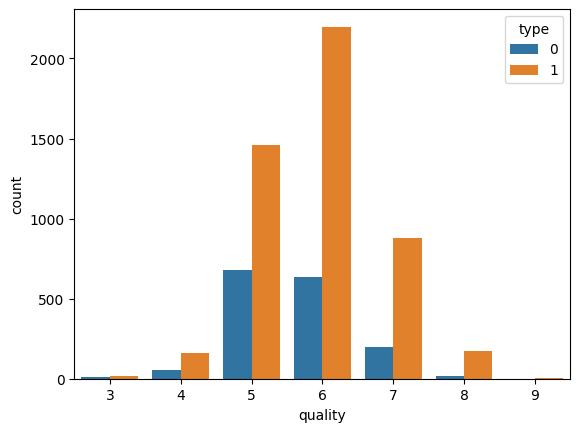

In [5]:
# Plot the quality of wine by type
sns.countplot(x='quality', data=data, hue='type')

## Plotting the histogram wrt features

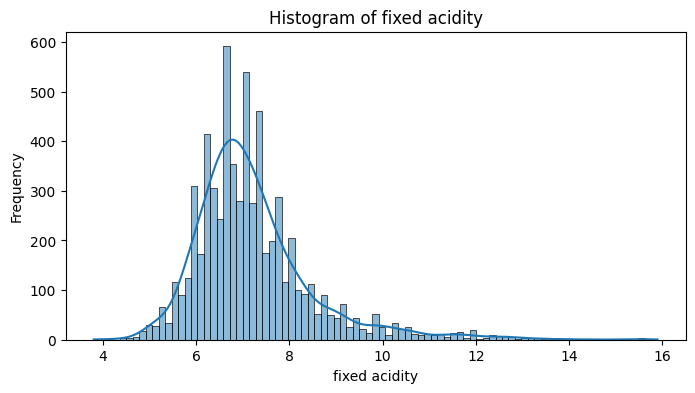

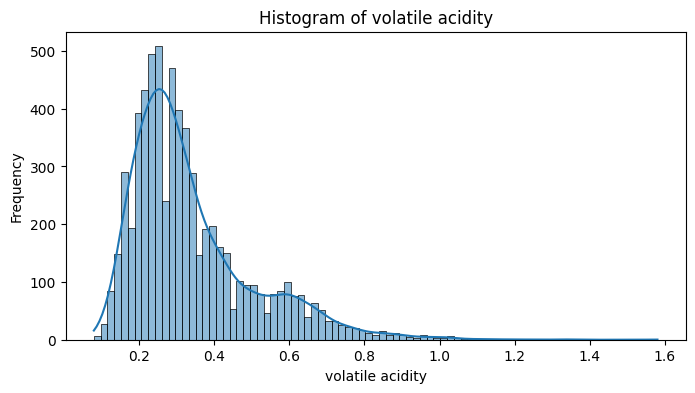

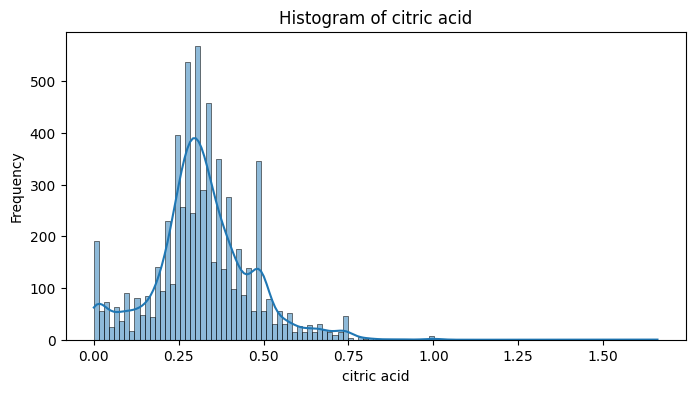

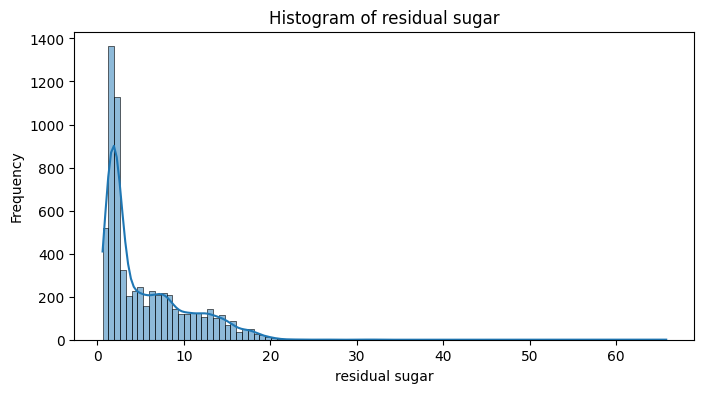

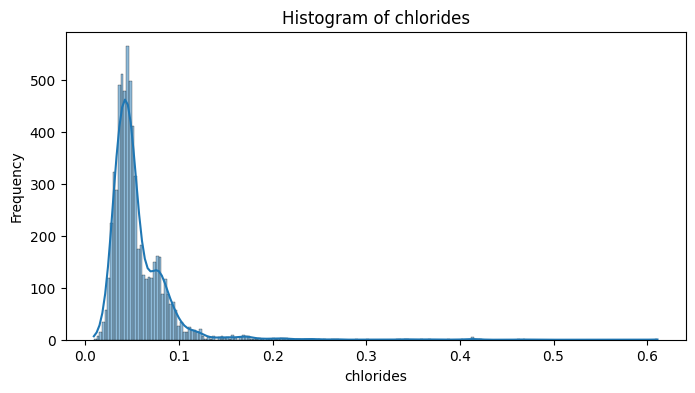

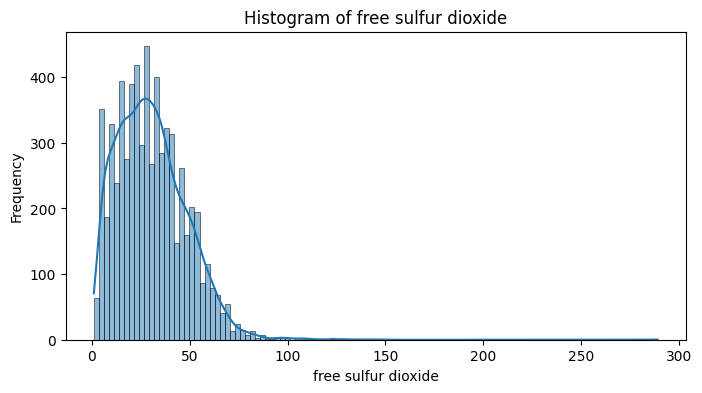

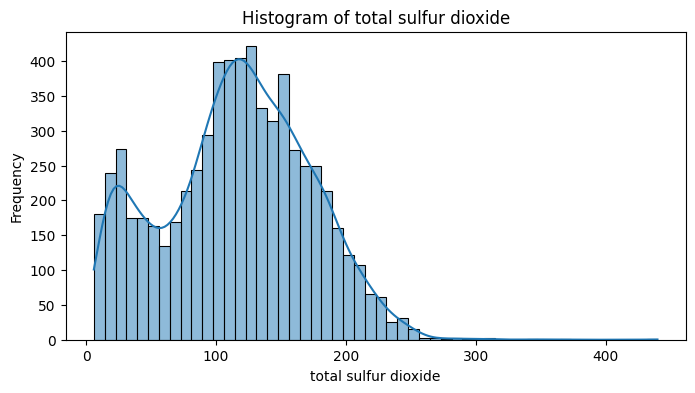

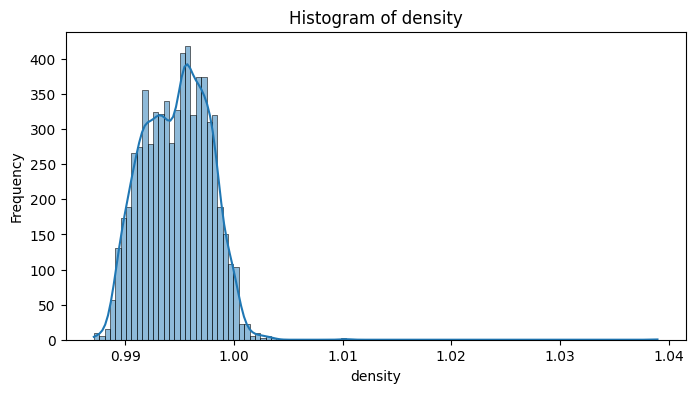

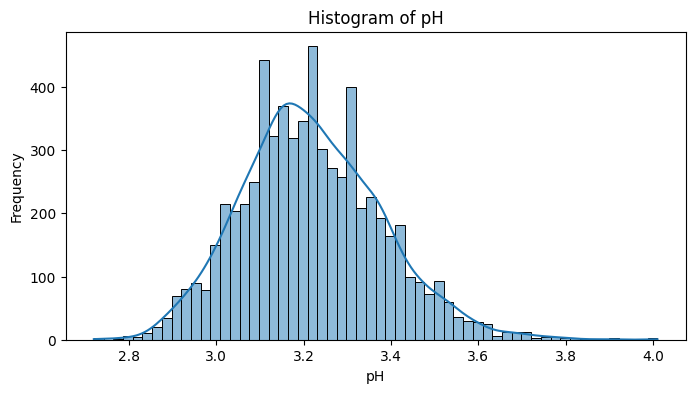

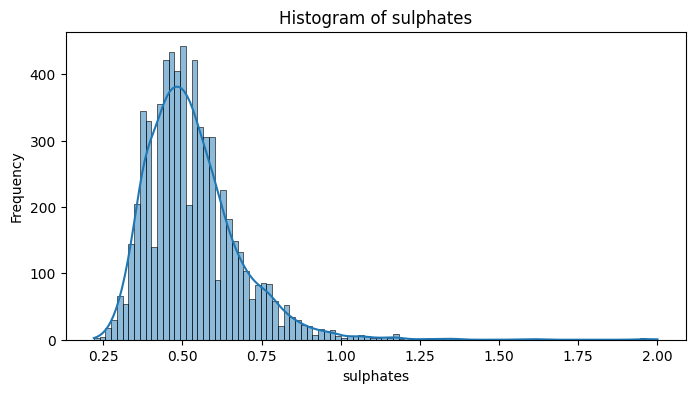

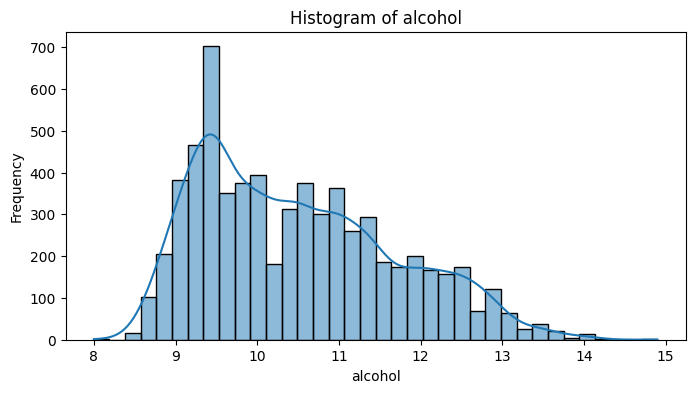

In [6]:
df = data.drop('quality', axis=1)
df = df.drop('type',axis=1)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


## Plotting the correlation matrix to see the relation between different features

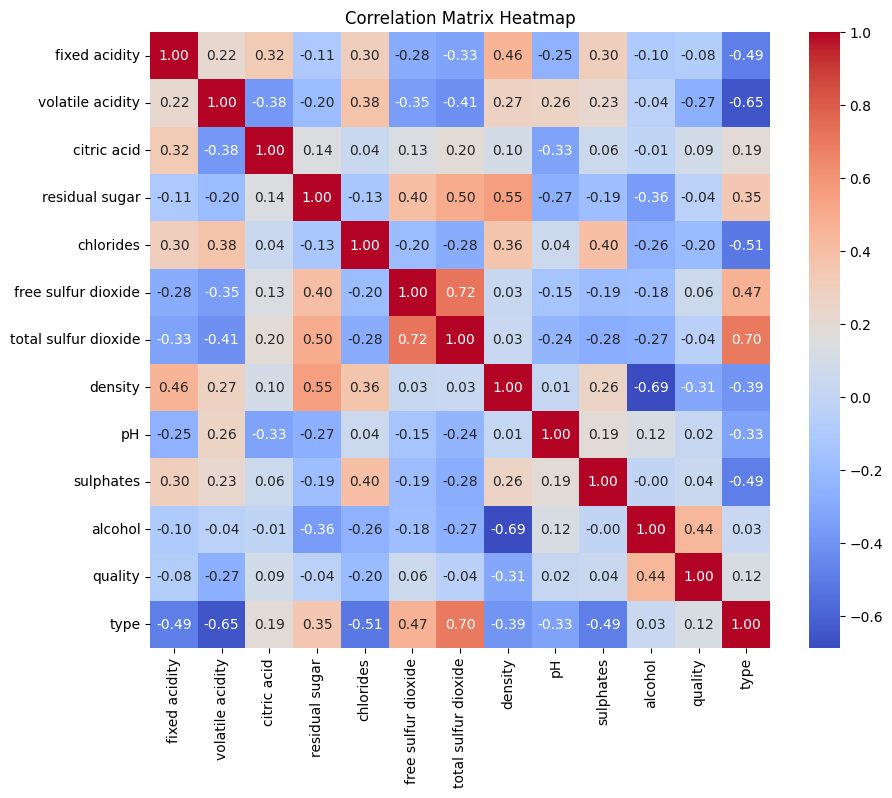

In [7]:
# Correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Models

In [8]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data.drop('quality', axis=1), data['quality'], test_size=0.2)

# Define the function to evaluate the model
def evaluate(y_test, y_pred):
    # Metrics: MAE, R2, AC
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)
    
    print(f"MAE: {mae:.4f}")
    print(f"R2: {r2:.4f}")
    print(f"Accuracy: {ac:.4f}")
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot()

In [9]:
def clas_rep(y_true, y_pred):
    # Get the unique class labels
    unique_classes = set(y_true)

# Initialize dictionaries to store metrics for each class
    precision_dict = {}
    recall_dict = {}
    f1_dict = {}

# Calculate metrics for each class
    for cls in unique_classes:
    # Create binary arrays for the current class
        y_true_cls = [1 if label == cls else 0 for label in y_true]
        y_pred_cls = [1 if label == cls else 0 for label in y_pred]

    # Calculate precision, recall, and F1-score
        precision = precision_score(y_true_cls, y_pred_cls)
        recall = recall_score(y_true_cls, y_pred_cls)
        f1 = f1_score(y_true_cls, y_pred_cls)

    # Store metrics in dictionaries
        precision_dict[cls] = precision
        recall_dict[cls] = recall
        f1_dict[cls] = f1

# Print metrics for each class
    for cls in unique_classes:
        print(f"Class {cls}:")
        print(f"Precision: {precision_dict[cls]:.2f}")
        print(f"Recall: {recall_dict[cls]:.2f}")
        print(f"F1-score: {f1_dict[cls]:.2f}")
        print()

# Ordinal Regression

MAE: 0.5154
R2: 0.2016
Accuracy: 0.5369


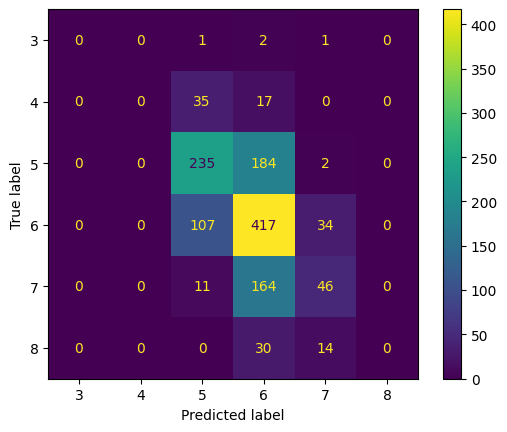

In [10]:
# Ordinal regression
orr = LogisticAT()
orr.fit(x_train, y_train)
y_pred = orr.predict(x_test)
evaluate(y_test, y_pred)
y_orr = y_pred

In [11]:
clas_rep(y_test, y_pred)

Class 3:
Precision: 0.00
Recall: 0.00
F1-score: 0.00

Class 4:
Precision: 0.00
Recall: 0.00
F1-score: 0.00

Class 5:
Precision: 0.60
Recall: 0.56
F1-score: 0.58

Class 6:
Precision: 0.51
Recall: 0.75
F1-score: 0.61

Class 7:
Precision: 0.47
Recall: 0.21
F1-score: 0.29

Class 8:
Precision: 0.00
Recall: 0.00
F1-score: 0.00



/home/sterben/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sterben/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sterben/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Linear Regression

MAE: 0.5300
R2: 0.1849
Accuracy: 0.5215


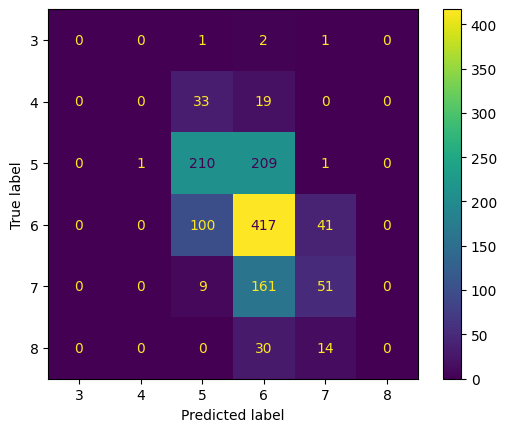

In [12]:
# Linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
# Linear regression is not suitable for classification. We need to round the values
y_pred = np.round(y_pred)
evaluate(y_test, y_pred)

y_lr = y_pred

In [13]:
clas_rep(y_test, y_pred)

Class 3:
Precision: 0.00
Recall: 0.00
F1-score: 0.00

Class 4:
Precision: 0.00
Recall: 0.00
F1-score: 0.00

Class 5:
Precision: 0.59
Recall: 0.50
F1-score: 0.54

Class 6:
Precision: 0.50
Recall: 0.75
F1-score: 0.60

Class 7:
Precision: 0.47
Recall: 0.23
F1-score: 0.31

Class 8:
Precision: 0.00
Recall: 0.00
F1-score: 0.00



/home/sterben/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sterben/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
rdf = pd.DataFrame({'Actual': y_test, 'Ordinal Regression': y_orr, 'Linear Regression': y_lr})
rdf

,Actual,Ordinal Regression,Linear Regression
724,7,6,6.0
2217,6,6,6.0
4442,5,5,6.0
934,5,6,6.0
1695,6,6,6.0
...,...,...,...
1467,7,6,6.0
276,6,6,6.0
252,5,6,6.0
931,5,5,5.0


From the above data, we can see that ordinal regression and linear regression give similar predictions and have almost same classification report and metrics(such as MSE, R2, Accuracy) in most cases. This can be due to linearity of the relation between predictor variables and target variable.